# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [23]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
response = requests.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [26]:
# Create a Beautiful Soup Object
#html = browser.html
soup = BeautifulSoup(response.text, 'html.parser')

In [27]:
# Extract all rows of data
#table = soup.find('table', class_='table')
all_text = soup.get_text()
print(all_text)
#Find the header elements in the table 
#header = table.find_all('th')

#create an empty list for the column names ( header elements)
#columns = []

#Loop through all the elements of the header
#for i in range(len(header)):
    #add the elements to the header string, with a comma
 #   columns.append(header[i].text)

#Print all the header elements, including the last one
#print(f"Columns: {columns}")    








Mars Temperature Data








Mission To Mars




Mars Temperature Data
This is Mars data.


id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
#find all the rows (class data-row to ignore header)
table = soup.find('table')

rows = table.find_all('tr')


In [29]:
#create an empty list
data = []
#extract all rows from the table
headers = [header.text.strip() for header in rows[0].find_all('th')]

#Loop through the scraped data to create a list of rows
for row in rows[1:]:
    columns = row.find_all('td')
    if len(columns) >0: 
        row_data = [col.text.strip() for col in columns]
        data.append(row_data)
                                            

In [30]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=headers)

#with all the data saved in the DataFrame, the browser cab be closed
browser.quit()

In [31]:
# Confirm DataFrame was created successfully
# Print the list to confirm success
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [32]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [33]:
# Change data types for data analysis
#Numerical types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

#convert  to integers
df['sol'] = df['sol'].astype(int)
df['month'] = df['month'].astype(int)

#convert to floats
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?
num_of_months = df['month'].nunique()
print(f"There are {num_of_months} months on Mars.")


There are 12 months on Mars.


In [35]:
# 2. How many sols (Martian days) worth of data are there?
#num_of_sols = df['sol'].nunique()
#print(f"There are {num_of_sols} Martian days (sols) worth of data (distinct values)")

num_of_sols = df['sol'].count()
print(f"There are {num_of_sols} Martian days (sols) worth of data")

There are 1867 Martian days (sols) worth of data


In [36]:
# 3. What is the average minimum temperature by month?
avg_temp_per_month = df.groupby(['month']).mean('min_temp')['min_temp']
print(avg_temp_per_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


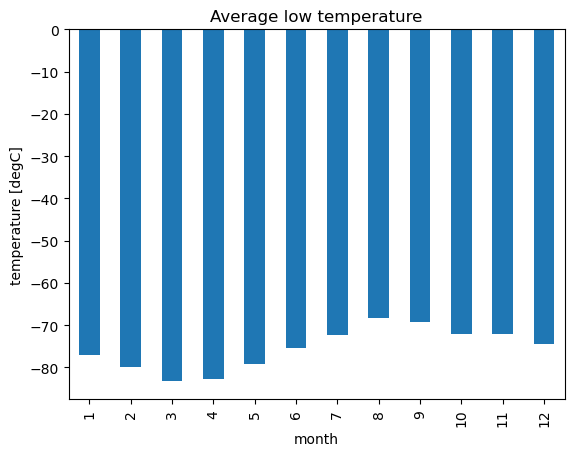

In [37]:
# Plot the average minimum temperature by month
avg_temp_per_month.plot.bar('min_temp', title = 'Average low temperature', ylabel = 'temperature [degC]')

#save image 
#plt.savefig('Output/avg_temp_per_month_sorted')

#show plot
plt.show()

In [38]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph


In [39]:
# 4. What is the average pressure by month?
avg_press_per_month = df.groupby(['month']).mean('pressure')['pressure']
display(avg_press_per_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

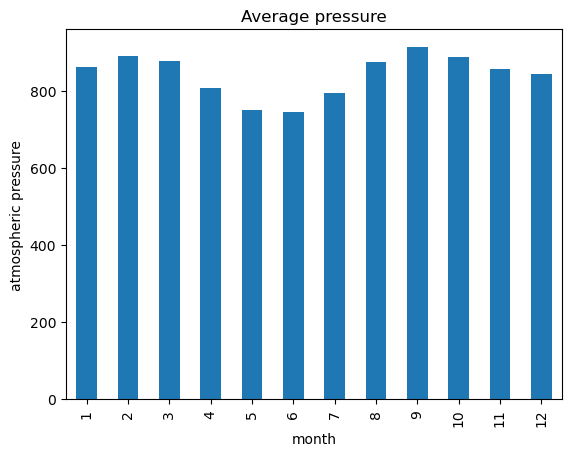

In [40]:
# Plot the average pressure by month
avg_press_per_month.plot.bar('min_temp', title = 'Average pressure', ylabel = 'atmospheric pressure')

#show plot
plt.show()

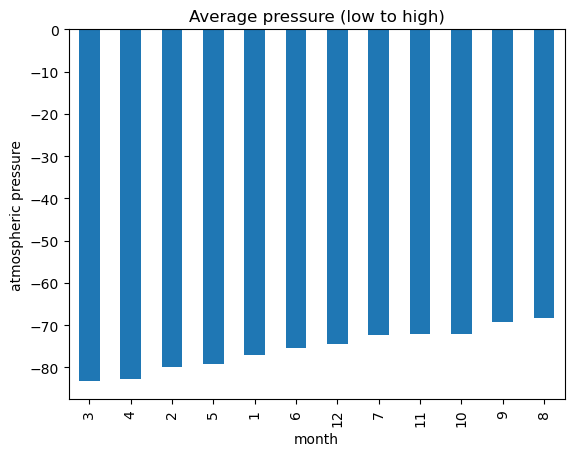

In [41]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_temp_per_month_sorted = avg_temp_per_month.sort_values()

#plot the average pressure by month (sorted from low to high)
avg_temp_per_month_sorted.plot.bar('min_temp', title = 'Average pressure (low to high)', ylabel = 'atmospheric pressure')

#save image as PNG
#plt.savefig('Output/avg_press_per_month_sorted.png')

#show plot
plt.show()

Start day: 2012-08-16 00:00:00
Start day: 2018-02-27 00:00:00
Mission duration: 2021 terrestrial days
Number of days between peaks: ~0
Error compared to real value (687 days): -100.00%


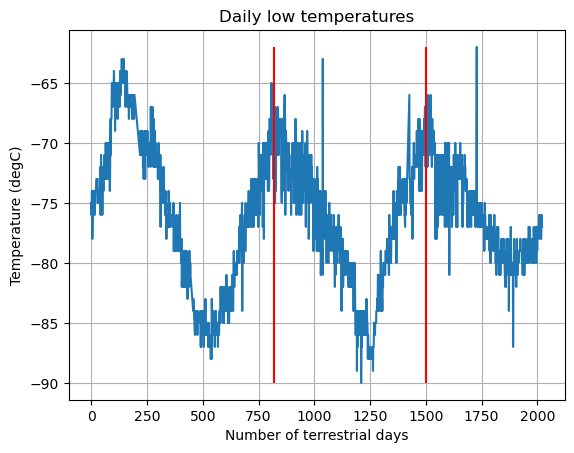

In [42]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
daily_temperature = df[['terrestrial_date', 'sol', 'min_temp']]

#get the first and last dates of the missions (based on the available data)
first_day = daily_temperature['terrestrial_date'].min()
last_day = daily_temperature['terrestrial_date'].max()

#print the first and last mission days 
print(f'Start day: {first_day}')
print(f'Start day: {last_day}')

#calculate # of terrestrial days over mission
delta = last_day - first_day
num_of_days = delta.days

#print the mission duration
print(f"Mission duration: {num_of_days} terrestrial days")

#ignore 
pd.set_option('mode.chained_assignment', None)

#create new column
daily_temperature['Number of terrestrial days'] = 0

#iterate through DataFrame
for index, row in daily_temperature.iterrows():
    #calculate the # days since beginning of mission and date in current row
    delta = daily_temperature.loc[index, 'terrestrial_date'] - first_day

    #save # of elapsed days in new column
    daily_temperature.loc[index, 'Number of terrestrial days'] = delta.days

#plot the temp vs # of days since start
daily_temperature.plot('Number of terrestrial days', 'min_temp', grid = True, title = 'Daily low temperatures', ylabel = 'Temperature (degC)', legend = False)

#Estimate peak to peak distance
peak_1_day = 820
peak_2_day =1500

#calculate the min and max temp 
min_temp = daily_temperature['min_temp'].min()
max_temp = daily_temperature['min_temp'].max()

#plot vertical lines to highlight peaks
plt.vlines(peak_1_day,min_temp, max_temp, 'r')
plt.vlines(peak_2_day,min_temp, max_temp, 'r')

#calculate # of days between peaks
peak_to_peak = peak_2_day - peak_2_day
print(f"Number of days between peaks: ~{peak_to_peak}")

#compare to real value
mars_year = 687
print(f"Error compared to real value ({mars_year} days): {100*(peak_to_peak-mars_year)/mars_year:.2f}%")

#save image as PNG
#plt.savefig("Output/daily_temperature.png")

#show plot
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV


In [ ]:
browser.quit()